In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import os
import cPickle as pickle
from collections import Counter
from datetime import datetime
from shutil import copyfile
import platform
import scipy.stats
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [3]:
def readJson(path):
    f = open(path)
    data = json.loads(f.read())
    return data

In [4]:
instaMeta = "/datasets/sagarj/InstagramDataset_2016_seeded/InstaMeta.json"
instaMetaJson = readJson(instaMeta)

In [5]:
users = [ instaMetaJson[i]['meta']['Meta']['media']['owner']['id'] for i in instaMetaJson ]

In [6]:
views = [float(instaMetaJson[i]['views'])+1 for i in instaMetaJson]

In [34]:
top10percent = np.asarray(views).argsort()[-750:][::-1]

In [35]:
thresh = views[top10percent[-1]]

In [36]:
popMeta = [ instaMetaJson[i] for i in instaMetaJson if instaMetaJson[i]['views'] > thresh ]

In [37]:
for 

SyntaxError: invalid syntax (<ipython-input-37-6555b14f4657>, line 1)

In [23]:
instaUserGraph = nx.Graph()
for t in  popMeta:
    dest = t['meta']['Meta']['media']['owner']['id']
    comments = t['meta']['Meta']['media']['comments']['nodes']
    likes = t['meta']['Meta']['media']['likes']['nodes']
    records = comments + likes
    if not instaUserGraph.has_node(dest):
        instaUserGraph.add_node(dest)
    for r in records:
        if r['user']['id'] != dest:
            if not instaUserGraph.has_edge(r['user']['id'],dest):
                instaUserGraph.add_edge(r['user']['id'], dest , weight=1 )
            else:
                instaUserGraph[r['user']['id']][dest]['weight'] += 1

In [24]:
len(instaUserGraph.edges())

59946

In [25]:
outdeg = instaUserGraph.degree()
to_keep = [n for n in outdeg if outdeg[n] > 1]
filteredPop = instaUserGraph.subgraph(to_keep)

In [26]:
len(filteredPop.edges())

511

In [27]:
rich_club = nx.rich_club_coefficient(filteredPop, normalized=True  , Q = 100 )

In [28]:
print rich_club


{0: 1.0, 1: 1.0, 2: 0.19047619047619047, 3: 0.0425531914893617, 4: 0.04597701149425287, 5: 0.012499999999999999, 6: 0.012987012987012986, 7: 0.014705882352941176, 8: 0.017857142857142856, 9: 0.017857142857142856, 10: 0.02173913043478261, 11: 0.029411764705882356, 12: 0.029411764705882356, 13: 0.029411764705882356, 14: 0.029411764705882356, 15: 0.038461538461538464, 16: 0.049999999999999996, 17: 0.049999999999999996, 18: 0.049999999999999996, 19: 0.049999999999999996, 20: 0.058823529411764705, 21: 0.06666666666666667, 22: 0.06666666666666667, 23: 0.06666666666666667, 24: 0.06666666666666667, 25: 0.06666666666666667, 26: 0.08333333333333333, 27: 0.08333333333333333, 28: 0.25, 29: 0.25, 30: 0.3333333333333333, 31: 0.3333333333333333, 32: 0.3333333333333333, 33: 0.3333333333333333, 34: 0.3333333333333333, 35: 0.3333333333333333, 36: 0.3333333333333333, 37: 0.3333333333333333, 38: 0.3333333333333333, 39: 0.3333333333333333, 40: 0.3333333333333333, 41: 0.3333333333333333, 42: 0.3333333333333

In [29]:
rich_coeff =  rich_club.values()

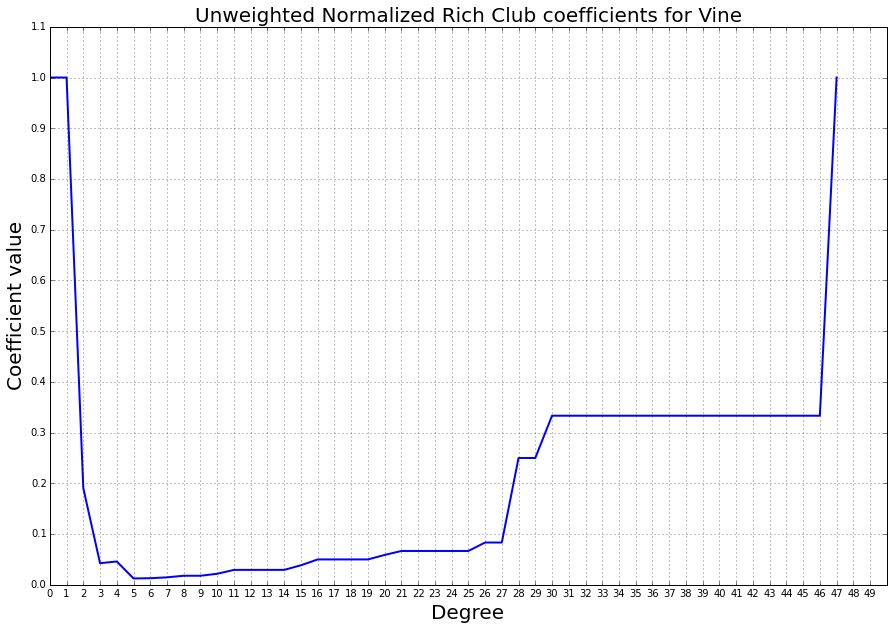

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.plot(rich_coeff,'b-',linewidth = 2.0)
plt.title("Unweighted Normalized Rich Club coefficients for Vine", fontsize = 20)
plt.xlabel("Degree",fontsize = 20)
plt.ylabel("Coefficient value",fontsize = 20)
plt.yticks(np.arange(0,1.2,0.1))
plt.xticks(np.arange(0,50 ,1))
plt.grid()
plt.show()